In [76]:
#importing the required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
#obtaining the web URL's content 
URL = "https://www.worlddata.info/africa/nigeria/inflation-rates.php"
page = requests.get(URL)
page

<Response [200]>

In [78]:
#using beautiful  soup parser on the content of the response.
soup = BeautifulSoup(page.content, 'lxml')

In [79]:
#extracting the required information  from the html tags 
table = soup.find('table')

all_headers = [header.text for header in table.find_all('th')]
headers = []
for header in all_headers:
    header = header.replace('Ø ', "")
    headers.append(header)

results = [{headers[i]: cell.text for i, cell in enumerate(row.find_all('td'))}
           for row in table.find_all('tr')]
del results[0]


In [80]:
results
result = []
for item in results:
    item['Nigeria'] = item['Nigeria'].replace(" %", "")
    item['EU'] = item['EU'].replace(" %", "")
    item['USA'] = item['USA'].replace(" %", "")
    item['World'] = item['World'].replace(" %", "")
    result.append(item)

In [81]:
#saving and reading the dataframe
df_1 = pd.DataFrame(result)
df_1

,Year,Nigeria,EU,USA,World
0,2021,16.95,2.55,4.70,3.50
1,2020,13.25,0.50,1.23,1.92
2,2019,11.40,1.63,1.81,2.19
3,2018,12.09,1.74,2.44,2.44
4,2017,16.52,1.43,2.13,2.19
...,...,...,...,...,...
57,1964,0.86,3.42,1.28,n/a
58,1963,-2.69,2.92,1.24,n/a
59,1962,5.27,3.55,1.20,n/a
60,1961,6.28,2.08,1.07,n/a


In [82]:
#the information of the dataframe
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     62 non-null     object
 1   Nigeria  62 non-null     object
 2   EU       62 non-null     object
 3   USA      62 non-null     object
 4   World    62 non-null     object
dtypes: object(5)
memory usage: 2.5+ KB


In [83]:
#the unique values in information
df_1.nunique()

Year       62
Nigeria    62
EU         59
USA        60
World      41
dtype: int64

In [84]:
#confirming the null values in the data
df_1.isnull().sum()

Year       0
Nigeria    0
EU         0
USA        0
World      0
dtype: int64

There are no null values in the dataset

In [85]:
#checking out the number of rows and columns 
print(df_1.shape)

(62, 5)


## Data Cleaning

In [86]:
#taking all the n/a values to be 0
df_1['World'] = df_1['World'].apply(lambda x: x.replace("n/a","0"))

In [87]:
#convert the values to float type
df_1['Nigeria'] = df_1['Nigeria'].astype('float')
df_1['EU'] = df_1['EU'].astype('float')
df_1['USA'] = df_1['USA'].astype('float')
df_1['World'] = df_1['World'].astype('float')

### Creating a Copy of The Dataset

In [88]:
#I would be working with this copy through out while the original dataframe would be for referencing when needed .
df = df_1.copy()
df.head()

,Year,Nigeria,EU,USA,World
0,2021,16.95,2.55,4.70,3.50
1,2020,13.25,0.50,1.23,1.92
2,2019,11.40,1.63,1.81,2.19
3,2018,12.09,1.74,2.44,2.44
4,2017,16.52,1.43,2.13,2.19


### The trend of inflation rate over the past five years in Nigeria, EU, USA and the World?

In [89]:
#grouping by year and country to see the inflation rates
Ng__inflation = df.groupby('Nigeria')['Year'].sum()
_inflation = Ng__inflation.sort_values(ascending=False).reset_index()
Ng_inflation = _inflation.head(5)
Ng_inflation

,Nigeria,Year
0,16.95,2021
1,13.25,2020
2,11.40,2019
3,12.09,2018
4,16.52,2017


In [90]:
#grouping by year and country to see the inflation rates in descending order
EU__inflation = df.groupby('EU')['Year'].sum()
_inflation = EU__inflation.sort_values(ascending=False).reset_index()
EU_inflation = _inflation.head(5)
EU_inflation

,EU,Year
0,2.55,2021
1,0.50,2020
2,1.63,2019
3,1.74,20181960
4,1.43,2017


In [91]:
#grouping by year and country to see the inflation rates in descending order
USA__inflation = df.groupby('USA')['Year'].sum()
_inflation = USA__inflation.sort_values(ascending=False).reset_index()
USA_inflation = _inflation.head(5)
USA_inflation

,USA,Year
0,4.70,2021
1,1.23,2020
2,1.81,2019
3,2.44,2018
4,2.13,2017


In [92]:
#grouping by year and country to see the inflation rates in descending order
World__inflation = df.groupby('World')['Year'].sum()
_inflation = World__inflation.sort_values(ascending=False).reset_index()
World_inflation = _inflation.head(5)
World_inflation

,World,Year
0,3.50,2021
1,1.92,2020
2,2.19,20192017
3,2.44,2018
4,1.55,2016


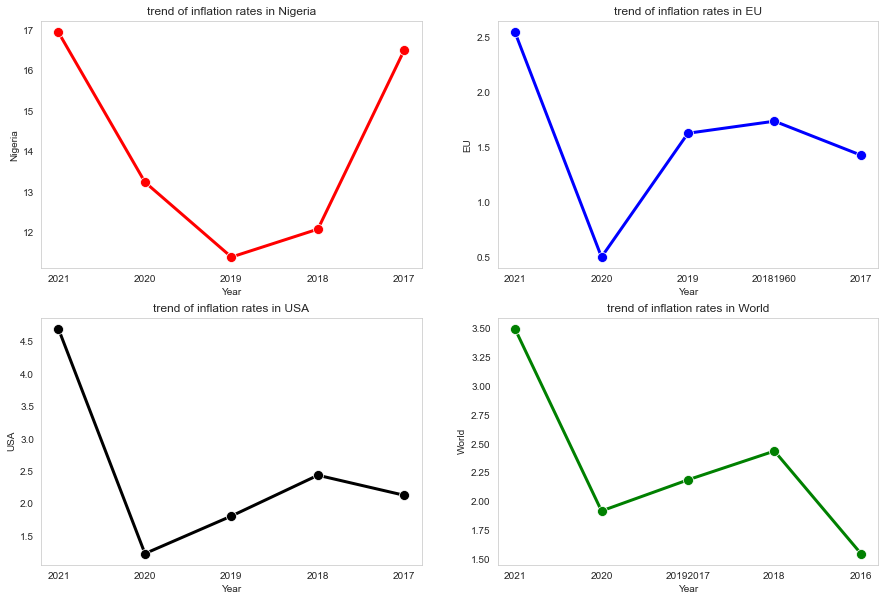

In [93]:
sns.set_style("whitegrid")

#make a subplot of size 2,2
plt.figure(figsize=(15,10))
# fig.tight_layout(pad=3)

#inflation rates in Nigeria
plt.subplot(2,2,1)
ax1 = sns.lineplot(data = Ng_inflation, y = 'Nigeria', x = 'Year', color='red', linewidth=3, marker='o', markersize=10)
ax1.title.set_text('trend of inflation rates in Nigeria')
ax1.grid(False)

#inflation rates in EU
plt.subplot(2,2,2)
ax2 = sns.lineplot(data = EU_inflation, y = 'EU', x = 'Year', color='blue', linewidth=3, marker='o', markersize=10)
ax2.title.set_text('trend of inflation rates in EU')
ax2.grid(False)

#inflation rates in USA
plt.subplot(2,2,3)
ax3 = sns.lineplot(data = USA_inflation, y = 'USA', x = 'Year', color='black', linewidth=3, marker='o', markersize=10)
ax3.title.set_text('trend of inflation rates in USA')
ax3.grid(False)

#inflation rates in World
plt.subplot(2,2,4)
ax4 = sns.lineplot(data = World_inflation, y = 'World', x = 'Year', color='green', linewidth=3, marker='o', markersize=10)
ax4.title.set_text('trend of inflation rates in World')
ax4.grid(False)
plt.show()